In [742]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [743]:
os.listdir('./data/')

['bmw.csv']

copyright - Christopher Blake 

# Project Motivation
Buying a used car can be very daunting. In Economics they would say there is a huge information asymmetry. The seller knows a lot more about the car than does the buyer, or perhaps the other way around. Another problem is that it can often be a one-off transaction. So there is less incentive to be completely honest. A third problem is the price. There was a sticker price on the vehicle in the car dealership. This probably reflected the cost of production and getting the car to market. But they say a car loses 20% of its value as it drives off the lot. What about the cost of driving the car, there is wear and tear. How about fuel? Diesel was once in favor but now it can hard to come by. Then there is gasoline and, electricity. And combinations. 
So what is a car worth? It is a combination of things. But in what order of these things that matters and how do they matter? Those are the question we try to explore here. This project will look at a few different features of used BMW cars. In solving this problem both buyers and sellers will have an opportunity to start at a better price point. Leading to more trustworthy transactions.

# The Dataset
The data is from the DataCamp github related to the certification process. It is a validated dataset for the purpose of certification on DataCamp. 

## Data Description
BMW Used Car Sales
Contains information for price, transmission, mileage, fuel type, road tax, miles per gallon(mpg), and engine size.
There are 8 features and 1 target variable (price). Price is a continous variable and can take on any reasonable value for a used car. So a total of 9 columns describing 22 different used BMW car models. In total there is 10781 observations. Also to note is that some car models have more than 1000 observations. Others have less than 30.

In [744]:
path = './data/bmw.csv'

In [745]:
df = pd.read_csv(path)

In [746]:
print(f'The number of unique car models is: {df.model.value_counts().nunique()}')

The number of unique car models is: 22


In [747]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


# Analysis Plan
The price of a used car is a continous variable. Since we also have the prices we can make this into a supervised learning problem. Regression analysis is a subfield of supervised machine learning. In a regression we try to find the relationship between a certain features and continuous target variable.

The following steps will be followed:
1. Identify suitable performance metrics based on what is known about the problem at this stage.
2. Make an exploratory data analysis(EDA) to identify data problems and discover any initial insights.
3. Select a suitable algorithm based on the information gained during exploratory analysis.
4. Fit, fine tune, evaluate and validate a model.
5. Discuss the merits of and improvements of the model.

# Performance Metrics
No information has been given as to how to prioritize a model's performance. As such it is my opinion that it is reasonable to either be able to predict prices in the aggregate well or predict the price well on any specific car. We can imagine a use case would most likely tend to the latter. Where it would usually be one car sale at a time and not many bulk transactions. 

## Regression analysis metrics
In regression, we try to fit a line as well as possible to the data to minimize a loss function. Meaning that our best line traversing the data would also produce the least loss.
A baseline for regression analysis is often the mean of the data. That is one value for all data points, a straight horizontal line through the data. In this case, the distance between the mean and each data point is called a deviation. The sum of these deviations would be our loss.
By shifting our line from a horizontal to have some angle (slope), and also adjusting the height from where it starts (intercept) we can get in many get a smaller loss.
The way we calculate the distance from the model line and each data point is what ends up determining the residuals or loss. So in the data, it was a deviation from the mean, for the model it is a residual from the model line. 
And there are a few ways to calculate these distances. There are also metrics to capture the difference between the mean horizontal line and the model line chosen.

### Three loss functions include and two performance metrics for a regression:
loss functions:
1. Mean Absolute Error (MAE)
2. Mean Squared Error (MSE)
3. Root Mean Squared Error (RMSE)

### performance metrics
1. R-Squared
2. Adjusted R-squared


### Comment
Each has its strengths and weaknesses. <b>For instance Mean Squared Error</b> for a model would be similar to variance in a dataset. Less technically, this type of loss function puts more weight on data that is far away from the model line. And more technically it has nice mathematical properties and can automatically adjust for data that are a bit more distributed to get these nice properties. 
<br> <b>Mean absolute error</b> would be more what people talk about in everyday life. Like the change in temperature over a few days. Maybe it is 5C$^{\circ}$ $\pm$ 2C$^{\circ}$ .
<br> At this point we cannot know what performs better. But it makes more sense for us to talk about the MAE, it has higher interpretability. We can also assume that cars will not display too much excessive dispersion. That is outliers could be more detail-oriented to the particular car than to some general pattern of dispersion.

# Exploratory Data Analysis - Numeric

In [748]:
display(df.head())

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


## Missing values denoted as Nan

In [749]:
if df.isnull().sum().max() == 0:
    print('There are no Nan values')
else:
    print('There are Nan values to work on')

There are no Nan values


## Duplicated entries?
Some records are exact copies. We do not have an identifying column in the dataset. So theoretically there could be cars with the same values for all columns.
I am prone to think these are duplicated entries though given that both price and mileage are related but continuous. We can't be sure, but at worst we still have identical datapoints to work with.

In [750]:
print(len(df))
print(df.duplicated(keep='first').sum())
df = df.drop_duplicates(keep='first').reset_index(drop=True)
print(len(df))

10781
117
10664


## Descriptive statistics for all columns
After looking at the default descriptive data and the visual data below. I decided to add more percentiles. The 1st and 99th percentile. There are some interesting extreme values. For instance the mileage max is very large compared to the mean or median. There is a also a price of 123456 that is probably incorrect. We can also see engineSize of 0. And a very large max value for mpg.

In [751]:
percentiles = [.01, .25, .5, .75, .99]
#excluding 'model','transmission' for report layout reasons
#df.describe(include='all', percentiles=percentiles).round(decimals=0)
df.drop(['model','transmission'], axis=1).describe(include='all', percentiles=percentiles).round(decimals=0)

,year,price,mileage,fuelType,tax,mpg,engineSize
count,10664.0,10664.0,10664.0,10664,10664.0,10664.0,10664.0
unique,NaN,NaN,NaN,5,NaN,NaN,NaN
top,NaN,NaN,NaN,Diesel,NaN,NaN,NaN
freq,NaN,NaN,NaN,6988,NaN,NaN,NaN
mean,2017.0,22693.0,25711.0,NaN,132.0,56.0,2.0
std,2.0,11435.0,25147.0,NaN,62.0,31.0,1.0
min,1996.0,1200.0,1.0,NaN,0.0,6.0,0.0
1%,2009.0,5994.0,10.0,NaN,0.0,27.0,2.0
25%,2016.0,14897.0,5666.0,NaN,135.0,46.0,2.0
50%,2017.0,20262.0,18783.0,NaN,145.0,53.0,2.0


In [752]:
numeric_data = ['year','price','mileage','tax','mpg','engineSize']

# Exploratory Data Analysis - Visual
Using the above information I adjust the visual exploration here to exclude the outliers in bottom and top 1%. These are established in the descriptive statistics and we will look at them closer below in a boxplot.I am using a pairplot here.I have also choosen to divide prices into bins. Lower prices having a black color and higher prices having an orange color. Having this hue in our scatterplots helps us see patterns in the data.

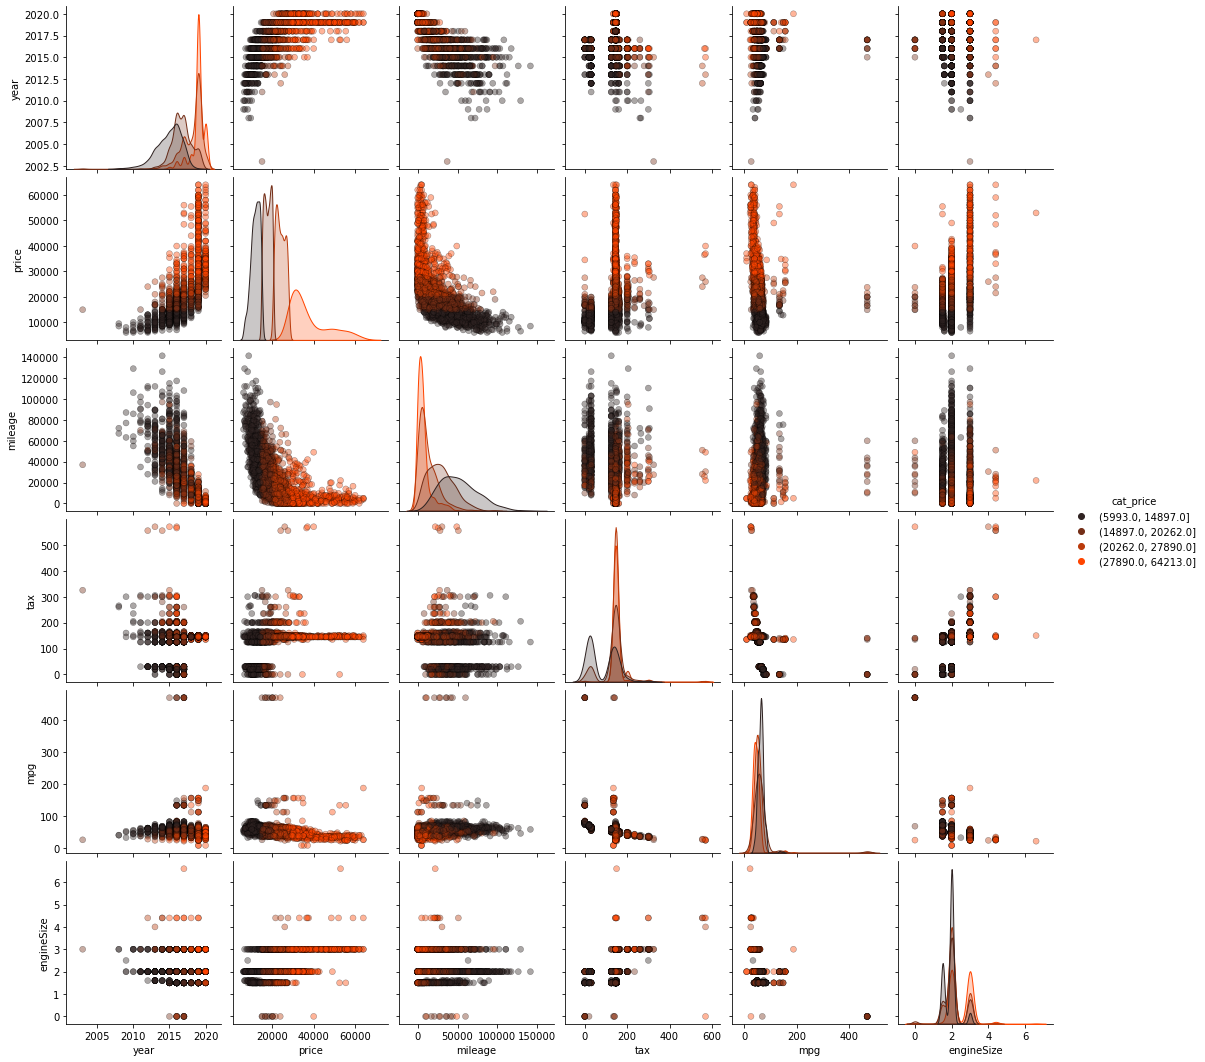

In [753]:
percentiles = [.01, .25, .5, .75, .99]
df['cat_price'] = pd.qcut(x=df.price, q=percentiles, retbins=False, precision=0)
red_scale = sns.dark_palette("orangered", 4)
sns.pairplot(data=df.sample(2000), hue='cat_price', diag_kws={'palette':red_scale}, plot_kws={'alpha':0.4, 'palette':red_scale, 'edgecolor': 'k'})
plt.show()

## Interpretation of pair plots
A black color means a low price a and and orange color means a higher price. Across the diagonal we have KDE:s and we can see that almost all of our data is skewed or has non-normal shapes. This makes many fully linear models hard to use. There are methods like using logs, square root or inverse of the values to remove skewness <br>  
We also see that many of the original columns that have integers or floats datatypes make straight bands. This is very clear in the tax and engineSize columns. These values could be better encoded as categorical. Year is also a good candidate to be categorical as we are not following something over time. Year has a long left tail, which means few observations for old cars.
<br>
There are many relationships in aggregate, like price-year or price-milage that look like some type of exponential distribution. However since we also have price categories as colors we can see that each sub category of price have different behaviors. Long tails for both high price cars and low price cars in the price-mileage relationship but to opposite directions. Our target variable price, ends up, in aggregate, having a roughly normal distribution with a long right tail.
<br>
Now we could try to exponentiate or use logs to get smoother distributions, which would be much better for linear models. However, there are so many non-linearities and bimodal distributions. <br>
I feel that approach is a bit pointless. Because we have not looked at one important factor here: <b>model</b>. As we know there are 22 models, and we can reasonably assume the price does not behave the same way for each model as well. This is something to bear in mind for the machine learning model stage. 
<br>
My decisions for how to categorize the data look something like the lists below. 

In [754]:
categorical_data = ['model', 'transmission', 'year', 'tax','engineSize','fuelType']
continous_data = ['price','mileage','mpg']

## Outliers
Outlier information is often lost in KDE:s or histograms if the count is very low. Making boxplots pretty good spotters for these outliers. Returning to the outliers that were omitted in the above pair plot. These outliers can be visualized in a boxplot.<br>
The data is sorted from smallest to largest by value. A box is made from the data spanning the 25th to 75th percentile. That is we have 50% of our data in the box. The green line is the median or 50th percentile. 
Anything beyond a distance from the box is classified as an outlier. The default is the distance from the 25th percentile to the 75th percentile (50% of the data) times 1.5. The whiskers sticking out is that distance.<br>
Boxplots can be tricky to interpret. Each circle is an observation that is pretty far away from our data and considered an outlier. I have also gone ahead and scaled the data down so that all columns can be compared side by side.

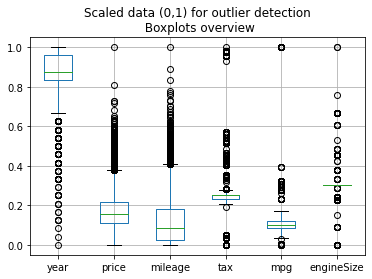

In [755]:
from sklearn.preprocessing import MinMaxScaler
# minmax scaler so that we can fit all the boxplots on the same axes.
exploration_scaler = MinMaxScaler()
box_plot_data = exploration_scaler.fit_transform(df[numeric_data])
box_plot_data = pd.DataFrame(box_plot_data, columns=numeric_data)
box_plot_data.boxplot()
plt.title('Scaled data (0,1) for outlier detection\n Boxplots overview')
#plt.yticks([])
plt.show()

### Interpretation of the boxplots and outliers
We can see for instance that cars tend to be close to the maximum of 1 for 'year' (the year 2020) but many cars are older.  Cars also tend to be closer to the minimum than the maximum for price and mileage.
We also see in the pair plot above (in the age, age KDE) that most cars are newer (the tail is almost flat on the left).<br>
We also see engineSize not converging to a good box. That is also true for the KDE, we get a bimodal looking distribution. These boxplots tell me again that I should be careful with a linear model. Many data points would not fit well on a line. In addition metrics such as variance and standard deviation that squares distances could make it even worse. Both our numerical and visual exploration now points to this.

# Correlations
Correlations can be helpful to spot linear relationships. More functionally they are a quick way to see if we might have two instances of the same a random series. Like duplicated columns. For instance two 'year' columns just slightly permutated. Or two close representations of a third variable, which is way more common. Below we see that mileage and year has a strong correlation. Old cars are driven more. Even though strongly correlated, we know that year and mileage are not the same. But if they were called X1 and X2 and we did not know what they were, we might have to look at them more closely. 

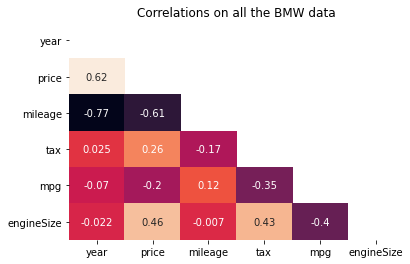

In [756]:
corr_matrix = box_plot_data.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, annot=True, mask=mask, cbar=False)
plt.title('Correlations on all the BMW data')
plt.show()

# Exploring, data cleaning, and engineering each column/field
We will go through each column and make adjustments and explorations. This is very extensive but a necessary preprocessing of the data. 

In [757]:
object_cols = df.select_dtypes(include='object')
for col in object_cols:
    print(col, df[col].unique())
#Leading blank spaces.
df['model'] = df['model'].str.strip()

model [' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series' ' 2 Series' ' 4 Series'
 ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4' ' X2' ' X6' ' 8 Series'
 ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3']
transmission ['Automatic' 'Manual' 'Semi-Auto']
fuelType ['Diesel' 'Petrol' 'Other' 'Hybrid' 'Electric']


##  model column
Car models have so far not been explored much. Since that would be a deciding factor in price we do a deeper dive here.

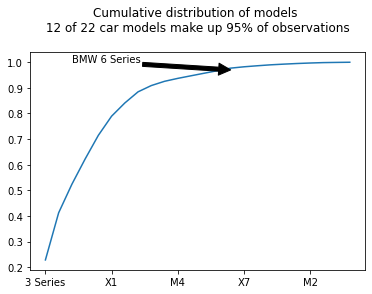

In [758]:
df.model.value_counts(normalize=True).cumsum()\
.plot(title='Cumulative distribution of models \n 12 of 22 car models make up 95% of observations \n')
plt.annotate('BMW 6 Series', xy=(14, 0.97), xytext=(2, 1), arrowprops=dict(facecolor='black'))
plt.show()

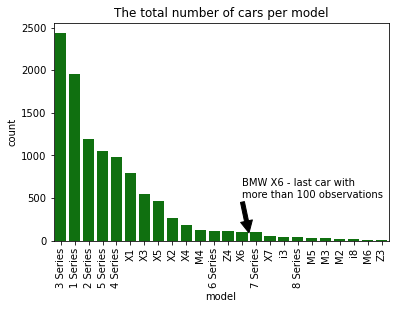

In [759]:
sns.countplot(data=df, x='model', color='g', order = df['model'].value_counts().index)
plt.xticks(rotation=90)
plt.annotate('BMW X6 - last car with \nmore than 100 observations', xy=(13.5, 90), xytext=(13, 500),
             arrowprops=dict(facecolor='black'))
plt.title('The total number of cars per model')
plt.show()

## year column
This could be a DateTime object. But for this analysis year is more of a categorical variable.
There is not much else to do with the year column. We could split it and call all low years pre 2006. Using year as a category does not improve the final machine learning model. So year stays as an int or float.

## price column
We saw some outliers in the data on the high side. Here we also check on the low side to see if there is something off. We find the most expensive car. And since it is a 2 Series way above the mean for 2 Series, we drop it.

In [760]:
display(pd.concat([df.iloc[df.price.nlargest(3).index], df.iloc[df.price.nsmallest(3).index]]).drop(['transmission','cat_price'], axis=1))

,model,year,price,mileage,fuelType,tax,mpg,engineSize
3565,2 Series,2015,123456,33419,Diesel,20,68.9,2.0
5261,M4,2016,99950,771,Petrol,300,33.2,3.0
2840,M4,2017,89990,1336,Petrol,145,33.2,3.0
9630,3 Series,1999,1200,82000,Petrol,245,31.0,2.8
9582,3 Series,2004,1445,162000,Diesel,205,49.6,2.0
9440,1 Series,2007,1500,167000,Diesel,125,57.6,2.0


In [761]:
expensive_cars_lst = df.price.nlargest(5).index.to_list()

In [762]:
most_expensive_car = df.iloc[df.price.nlargest(1).index]['model'].values[0]
print(most_expensive_car)
print(int(df[df['model'] == most_expensive_car].price.mean()))
df = df.drop(expensive_cars_lst[0]).reset_index(drop=True)

2 Series
19445


## transmission column 
no change

In [763]:
df.transmission.value_counts() 

Semi-Auto    4636
Automatic    3542
Manual       2485
Name: transmission, dtype: int64

## mileage
What we have to ask is are the large mileage value representative of that particular car model related to the price? It seems rare with cars having done close to the maximum of miles. So in general it would not be so helpful to include these. Here the top 1% of mileage cars are dropped.

In [764]:
print(df.mileage.nlargest(5))
df = df[df.mileage < df.mileage.quantile(.99)].reset_index(drop=True)

9304    214000
8199    190000
9299    178987
9439    167000
9886    164500
Name: mileage, dtype: int64


In [765]:
#display(df.iloc[df.mileage.nlargest(10).index])

In [766]:

#display(df.iloc[df.mileage.nlargest(10).index])

## fuelType column
There are some strange values regarding other and electric. We adjust the cateogries

In [767]:
df.fuelType.value_counts()

Diesel      6909
Petrol      3314
Hybrid       294
Other         36
Electric       3
Name: fuelType, dtype: int64

In [768]:
display(df[df['fuelType'].isin(['Electric','Other'])].head(3)) #['model'].unique()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,cat_price
16,3 Series,2017,14250,Automatic,55594,Other,135,148.7,2.0,"(5993.0, 14897.0]"
32,i3,2016,17100,Automatic,25269,Other,0,470.8,0.6,"(14897.0, 20262.0]"
35,2 Series,2017,13000,Automatic,61818,Other,0,141.2,1.5,"(5993.0, 14897.0]"


In [769]:
print(df[df['fuelType'].isin(['Electric','Other'])].model.value_counts())

3 Series    21
i3          10
2 Series     3
X5           3
5 Series     1
i8           1
Name: model, dtype: int64


In [770]:
df[df['model']=="3 Series"].groupby('fuelType')['mpg'].mean()

fuelType
Diesel     58.051270
Hybrid    125.520000
Other     138.557143
Petrol     44.491606
Name: mpg, dtype: float64

In [771]:
df[df['model']=="i3"].groupby('fuelType')['mpg'].mean()

fuelType
Electric    470.8
Hybrid      470.8
Other       470.8
Name: mpg, dtype: float64

In [772]:
print(df[df.fuelType=='Electric'].model.unique())

['i3']


### fuelType conclusions
It looks like the 'other' and Hybrid categories are about the same. We could put those together. There are only 3 'electric' in the entire dataset they are model i3 and have the same mpg as a hybrid. 

In [773]:
df['fuelType'] = df['fuelType'].str.replace('Other','Hybrid').str.replace('Electric','Hybrid')

## tax column
We seem to have a couple of values where most cars fall. $125-200 and below of above. We can bin the tax values to what it looks like in the visual exploration.

In [774]:
tax_bins = [-np.inf, 120, 200, np.inf]
labels = ['low','medium','high']
df['tax_bin'] = pd.cut(df['tax'], bins=tax_bins, labels=labels, ordered=True)

In [775]:
df.tax.value_counts()[:5]

145    5267
150    1227
30      966
125     827
20      479
Name: tax, dtype: int64

In [776]:
df['tax_bin'].head()

0    medium
1    medium
2    medium
3    medium
4    medium
Name: tax_bin, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

## mpg column

In [777]:
display(pd.concat([df.iloc[df.mpg.nlargest(5).index], df.iloc[df.mpg.nsmallest(5).index]]).drop(['transmission','cat_price'], axis=1))

,model,year,price,mileage,fuelType,tax,mpg,engineSize,tax_bin
32,i3,2016,17100,25269,Hybrid,0,470.8,0.6,low
619,i3,2017,19998,41949,Hybrid,140,470.8,0.0,medium
775,i3,2017,19998,41146,Hybrid,0,470.8,0.0,low
777,i3,2017,21898,10839,Hybrid,0,470.8,0.0,low
1802,i3,2017,19980,26965,Hybrid,140,470.8,0.0,medium
1232,X3,2020,52910,101,Hybrid,135,5.5,2.0,medium
2051,X3,2020,54990,2137,Hybrid,135,5.5,2.0,medium
6023,X3,2020,47000,1385,Hybrid,135,5.5,2.0,medium
6063,X3,2020,42990,3245,Hybrid,140,5.5,2.0,medium
6089,X3,2020,53995,2000,Hybrid,135,5.5,2.0,medium


### Problems with mpg
5.5 miles per gallon is very low and 470 is very high.
Looking at the descriptive statistics per model below, I am very confused as a non-car expert. There are min-max spreads within the same model of a factor of 15. I would not expect that.
The I3 already identified as a hybrid/electric could have a high value here. So does the i8.
But the miles per gallon for these cars may be radically different in meaning.
I am unhappy with the internal spread as well as the difference between i-models and others.
The x3 is probably a mistake at 5.5 minimum  These could be 55. A quick internet search confirms this. <br>
https://www.fueleconomy.gov/feg/bymodel/2021_BMW_X3.shtml
<br> As does the descriptive statistics on 'mpg' below where the median is roughly 55

In [778]:
df.groupby('model').describe()['mpg'].round().head() # too verbose

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
1 Series,1950.0,58.0,14.0,32.0,48.0,58.0,69.0,83.0
2 Series,1184.0,56.0,18.0,32.0,48.0,51.0,63.0,149.0
3 Series,2391.0,58.0,19.0,9.0,49.0,54.0,63.0,149.0
4 Series,978.0,55.0,9.0,34.0,49.0,55.0,66.0,71.0
5 Series,1031.0,62.0,23.0,24.0,51.0,60.0,63.0,157.0


In [779]:
# Replace the 5.5 mpg
mask = (df.model=='X3')&(df.mpg==5.5)
column_name = 'mpg'
df.loc[mask, column_name] = 55

In [780]:
# Dropping the i3 and i8 models
df = df[~df.model.isin(['i3','i8'])] 
# Their Counts are also too low to be helpful. At 43 and 17.
# Alternativly set these MPG to NAN in a Tree based model.

In [781]:
df[df.mpg >100].count().max()

197

In [782]:
# Dropping cars with more than 100 miles per gallon
df = df[df.mpg <100]

In [783]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,cat_price,tax_bin
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,"(5993.0, 14897.0]",medium
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,"(20262.0, 27890.0]",medium
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,"(14897.0, 20262.0]",medium
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,"(5993.0, 14897.0]",medium
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,"(5993.0, 14897.0]",medium


In [784]:
#df.groupby('model').describe()['mpg']

### mpg column conclusions
Two models were removed and some data that seemed like typos were changed.

## engineSize column
Could be categorized as small, medium and, large.

In [785]:
#Car models with a missing engine size.
display(df[df.engineSize==0].model.unique())

array(['1 Series', '3 Series', '2 Series', 'X5'], dtype=object)

In [786]:
df['engineSize'] = df['engineSize'].replace(0, np.nan)
df['engineSize'] = df['engineSize'].fillna(df.groupby('model')['engineSize'].transform('mean'))

In [787]:
engine_bins = [-np.inf, 1.98, 3, np.inf]
labels = ['small','medium','large']
df['engine_bin'] = pd.cut(df['engineSize'], bins=engine_bins, labels=labels, ordered=True)

In [788]:
df.groupby('model').describe()['engineSize'].head()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
1 Series,1950.0,1.889923,0.473366,1.5,1.5,2.0,2.0,3.0
2 Series,1146.0,1.897290,0.398339,1.5,1.5,2.0,2.0,3.0
3 Series,2289.0,2.194661,0.416233,1.5,2.0,2.0,2.0,3.0
4 Series,978.0,2.246421,0.431147,2.0,2.0,2.0,2.0,3.0
5 Series,981.0,2.234862,0.439814,2.0,2.0,2.0,2.0,4.4


In [789]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10299 entries, 0 to 10555
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   model         10299 non-null  object  
 1   year          10299 non-null  int64   
 2   price         10299 non-null  int64   
 3   transmission  10299 non-null  object  
 4   mileage       10299 non-null  int64   
 5   fuelType      10299 non-null  object  
 6   tax           10299 non-null  int64   
 7   mpg           10299 non-null  float64 
 8   engineSize    10299 non-null  float64 
 9   cat_price     10139 non-null  category
 10  tax_bin       10299 non-null  category
 11  engine_bin    10299 non-null  category
dtypes: category(3), float64(2), int64(4), object(3)
memory usage: 835.2+ KB


In [790]:
#df.describe(include='all') too verbose

# Recap on feature engineering and data cleaning
We have created some new categorical features. Such as the tax bin or engine bins. Bins are good for exploration but not necessarily for modeling. It is worth mentioning that many algorithms/models like to make bins. Such as XGBoost and other histogram-based models. This thends to make the algorithm faster. Another perhaps interesting feature enginerring column could be the count for each car model. That couont could help a linear model. <br>
Almost every column in the dataset has now had a change to.

# Machine learning development thoughts
As concluded eariler, we have a regression problem. So a linear regression and would come to mind. <br> However we have so many categorical values, and that makes a linear regression harder to do. These categorical values are probably important details for each car model. So we have, in my oppinion, categories of car models with nested features that are both categorical and continous. 

# A baseline and a fair comparison to model development
Below we see a simple approach of using the mean and the error for a random sample of the entire datadata. We also use a group-by object for each car model. If an algorithm does not beat a look-up table of say 'model' + 'year'. We have to consider just using a look-up table instead. Look-ups makes a lot of sense for car datasets. However since we also have many of small details, these tables can get quite large. <br> The 'mad' statistic below is the <b>mean average deviation</b>, or mean average error for a model. We could also have the standard deviation. <br>
We see a mean of about USD 22700 and an average error of USD 8440 for the entire data, so that is the best guess given all data and no sorting. A group-by operation brings the error down further, if we compare it to the '1 Series' average there is a huge difference. This group-by operation is our baseline comparison to model development.

In [791]:
np.random.seed(1)
random_sample = df.sample(1000).price.agg({'mean','mad'})
display(random_sample.head().astype(int))

# Calculating the mean for each bmw car model.
grouped_mean_price = df.groupby('model')['price'].agg({'mean', 'mad'})
display(grouped_mean_price.head(3).astype(int))

mean    22719
mad      8440
Name: price, dtype: int32

,mean,mad
model,,
1 Series,15877,4740
2 Series,19348,4342
3 Series,20234,6890


# Decision Tree and Random Forest
Since we also then have a lot of categorical data a decision tree is a good start. A decision tree uses if-else statements to sort through the data maximizing some criterion. Such as: if 'model' == '1 Series' and 'miles == 100000' + criterion then 'price' is approximately xxx. Roughly speaking.<br>
However, this model can be prone to high variance or overfitting to the training data. This results in a model that does well on the training data but does not generalize well on unseen data. To combat this we will create some hold-out data to validate model performance and use a random forest.<br>
An ensemble of trees like a random forest model usually handles overfitting better. The forest's tree-models use subsets of the training data with resampling. That is for each tree in the forest, random data is drawn and used. It also doesn't maximize the criterion in the same way as a tree would. It also uses randomness on how to sort. So it does not necessarily pick the immediately 'best' step as atree with all data would, but more of a random choice between all the steps.<br>
<br>
The plan is to use a Random Forest or similar model and do a random search for the best hyperparameters.

In [792]:
# dropping the columns that are not going to be a part of modelling.
#random forest can handle the original data.
df = df.drop(['tax_bin','engine_bin','cat_price'], axis=1) 
display(df.head())

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


# Curse of dimensionality, one-hot encoding, and Tree-based models
Here I have done some trial and error. If I proceed from this point with splitting the data and tuning with a random search I end up with models that do not do that well or cannot converge properly. <br>
Why? The problem is with one hot encoding categorical data and creating a large number of dimensions. Each car model creates a new column in the data. There are enough dimensions in this dataset to throw off modeling with that approach.  <br> I read up on this problem of having too many categories in a tree-based model. For instance, an article by Ler Wei Han 'High Number of Unique values and Tree-Based models' describes the problem in a zip code dataset and what research is being done on the problem. So more clarity on the problem can be gotten there <br>
The problem here is that <b> the information in 'model' is too important to split or transform </b>
So how do I solve this problem in this project? We have to answer ONE question. Do you know the model of the car you are selling or buying? - Yes, almost always.

So in machine learning ensembles of models can do well, but how about splitting models into smaller models? With the information of model, I can make a loop of models. That is what I do here to deal with high dimensionality data.
<br> We start by splitting out some data for testing later.

In [793]:
#df.model.value_counts() # very verbose

In [794]:
# This gets the cars with most observations first. 
    # Helpful for modelling since low count 'model' may not converge.
car_models = []
model_data = []
for model in df.model.value_counts().index:
    car_models.append(model)
    model_data.append(df[df['model']==model])

In [795]:
#car_models

# Model validation and a hold out set.
In addition to splitting the data with split_data function we also get a validation set of data. This corresponds to about 5% of our data. Because of the approach I take later there is a slight adjustment to a regualar train test split of the data.

In [796]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def split_data(data):
    """Splits the data for one car model"""
    assert data.model.nunique() == 1, "data should have only one model"
    y = data.price
    X = data.drop(['price','model'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state=1)
    # Stratify is not necessary but would be if we did not subselect model.
    return X_train, X_test, y_train, y_test   

In [797]:
X_train, X_test, y_train, y_test = split_data(model_data[0])
display(X_train.head())

,year,transmission,mileage,fuelType,tax,mpg,engineSize
2149,2019,Manual,4850,Diesel,145,64.2,2.0
8922,2013,Manual,64377,Diesel,20,68.9,2.0
8918,2010,Manual,96000,Diesel,30,62.8,2.0
8049,2013,Automatic,48000,Diesel,125,57.6,3.0
3531,2018,Semi-Auto,26173,Diesel,145,60.1,2.0


# Pipeline Object
The pipeline object is maily used to be able to swap out models and create simpler code in the long run. It also has the added benefit of auto-imputing data that may be missing. Both are valid stand-alone reasons to use a pipeline object for production and deployment. <br> There is also a features list that we will use for looking at what features one machine learning model finds useful.

In [798]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

features = []

def make_tree_preprocessor(train):
    """Makes a preprocessing pipeline for a tree based model"""
    features.append(pd.get_dummies(train, drop_first=False).columns.to_list())
    # Saving the features using pandas for interperability of feature importances
    categorical_cols = X_train.select_dtypes(include='object').columns.values
    numerical_cols = X_train.select_dtypes(exclude='object').columns.values
    numerical_transformer = SimpleImputer(strategy='constant') # Default is to fill with 0.
    cat_steps=[('imputer', SimpleImputer(strategy='most_frequent')),
               ('onehot', OneHotEncoder(handle_unknown='ignore'))]
    categorical_transformer = Pipeline(steps=cat_steps)
    tree_preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])
    return tree_preprocessor 

# Below is the code for a regression model. 
# It also includes scaling, and mean imputation.
def make_reg_preprocessor(train):
    """Makes a preprocessing pipeline for many non-tree based models"""
    features.append(pd.get_dummies(train, drop_first=False).columns.to_list())
    categorical_cols = X_train.select_dtypes(include='object').columns.values
    numerical_cols = X_train.select_dtypes(exclude='object').columns.values
    numeric_steps = [('num_imputer', SimpleImputer(strategy='mean')),
                     ('scaler', StandardScaler())]
    numerical_transformer = Pipeline(steps=numeric_steps)
    cat_steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')),
               ('onehot', OneHotEncoder(handle_unknown='ignore'))]
    categorical_transformer = Pipeline(steps=cat_steps)
    reg_preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])
    return reg_preprocessor

# Alogrithm selection and proof of concept with cross-validation
Seeing as how our data is so categorical we will use a random forest regressor. These types of tree-based models are good for certain mixes of categorical and numerical features. It operates with many sub-models using several if-else types of splitting rules to try to find what matters. Maybe 10000 miles matters greatly more than 9999. The code below tries this approach for one car model. 
<br>
Since we want to avoid overfitting we also use cross-validation. This splits and tests the each random forest with different holdout data.

In [799]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

def make_pipeline(X_train, model):
    pipeline = Pipeline(steps=[('preprocessor',make_tree_preprocessor(X_train)),('model',model)])                 
    return pipeline

model = RandomForestRegressor(n_estimators= 100, random_state=0)

pipeline = make_pipeline(X_train, model)

scores = -1 * cross_val_score(pipeline, X_train, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MEAN ABSOLUTE ERROR for a Random Forest in USD:", int(scores.mean()))
print("Average MEAN ABSOLUTE DEVIANCE using grouped data in USD:", int(grouped_mean_price.iloc[0,0]))
print("Average MEAN ABSOLUTE DEVIANCE using the mean of the data in USD:", int(random_sample[0]))

Average MEAN ABSOLUTE ERROR for a Random Forest in USD: 1391
Average MEAN ABSOLUTE DEVIANCE using grouped data in USD: 15877
Average MEAN ABSOLUTE DEVIANCE using the mean of the data in USD: 22719


# Evaluating using the mean, a group-by table and our Random Forest
We can see that the added benefit of grouping the data is about cutting the mean absolute error in half from a random sample.
Introducing a machine learning model further cuts the grouped error in 3. This means that using a machine learning model is be a good idea. It beats both the mean and a grouped table by a lot.

# Model hyperparameter Tuning
All algorithms use different hyperparameter with default values. Below we try different combination of these hyperparameters. For example is it better with 50 Trees or 200 Trees in a forest? There are many more ways to do this. Here since we have many submodels we will use probabilities and something computationally faster, the random search.

In [800]:
param_dist = {"model__max_depth": np.arange(3, 8, 1), # np.arange(3, 11, 1)
              'model__n_estimators': np.arange(50, 301, 50), # (50, 201, 50)
              "model__max_features": np.arange(3, 8, 1), # np.arange(3, 10, 1)
              #"model__min_samples_leaf": [3, 5],
              #"model__criterion": ["gini", "entropy"]
             }

In [801]:
from sklearn.model_selection import RandomizedSearchCV

def make_randomized_search(pipeline, param_dist):
    return RandomizedSearchCV(pipeline, param_dist, cv=5, n_iter=20, verbose=0, scoring='neg_mean_absolute_error')

tree_cv = make_randomized_search(pipeline, param_dist)

In [802]:
tree_cv.fit(X_train, y_train)
print(int(-1 * tree_cv.best_score_))
print(tree_cv.best_estimator_['model'])

1515
RandomForestRegressor(max_depth=7, max_features=6, n_estimators=300,
                      random_state=0)


# Feature importances for the BMW 3 Series
The trees in the random forest come up with what features they find most informative to split on. Below we see that year and mileage seems very informative. While the fuelType is not so informative.

In [803]:
feature_importances = pd.DataFrame(zip(features[0], tree_cv.best_estimator_['model'].feature_importances_), columns=['feature','importance'])
display(feature_importances.sort_values('importance', ascending=False).head(10))

,feature,importance
0,year,0.499826
1,mileage,0.287408
2,tax,0.075756
3,mpg,0.061091
4,engineSize,0.049356
6,transmission_Manual,0.011183
7,transmission_Semi-Auto,0.006159
10,fuelType_Petrol,0.003872
8,fuelType_Diesel,0.003422
5,transmission_Automatic,0.001716


# Evaluating on the test data

In [804]:
def get_test_score(RSmodel, X, y):
    """Evaluates a pipeline object on test data"""
    return int(-1 * RSmodel.score(X, y))
print(get_test_score(tree_cv, X_test, y_test))       

1622


# Conclusions of hyperparameter tuning
We have evaluated our pipelined process and model on the test data. The errors should not be wildly off. And they are not. <br>
The default hyperparameters and tuned hyperparameters are not much different. But since there are a few dollars to be gained for the 2 Series perhaps other cars also can see the benefit. 
It is computationally intense to do this, but manageable with the size of this data.

# Expanding the concept to all BMW car 'model's and preparing for deployment
Here we use the concept from one model to as many models as possible in the dataset. Some cars have too few observations to work in a machine learning model. We can see the counts in the 'model' column visual exploration. We are also using the test/holdout data previously set aside with the split_data function to really give the model a run for it's money.

In [805]:
deployable_models = {}
feature_importances_df = pd.DataFrame(index=features[0])
features = []

for i in range(len(car_models[:car_models.index('8 Series')+1])): # The Models do not converge Beyond '8 Series'
#for i in range(len(car_models)):
    X_train, X_test, y_train, y_test = split_data(model_data[i])
    tree_preprocessor = make_tree_preprocessor(X_train) 
    model = RandomForestRegressor(n_estimators= 100, random_state=0)
    pipeline = make_pipeline(X_train, model)
    make_randomized_search(pipeline, param_dist) # Param_dist - Declared above
    tree_cv = make_randomized_search(pipeline, param_dist)
    tree_cv.fit(X_train, y_train)
    features = pd.get_dummies(X_train, drop_first=False).columns.to_list()
    features_df = pd.DataFrame(index=features, data=tree_cv.best_estimator_['model'].feature_importances_, columns=[car_models[i]+' importance'])
    feature_importances_df = feature_importances_df.join(features_df)
    print(car_models[i], 'Random Forest Train Data error: $'  + str(get_test_score(tree_cv, X_train, y_train))\
          +'. Holdout/Test data error (MAE): $'+ str(get_test_score(tree_cv, X_test, y_test))\
          +'. Look-Up (MAD): $'+ str(int(grouped_mean_price.loc[car_models[i],'mad'])))
    deployable_models[car_models[i]]=tree_cv #.best_estimator_['model']

3 Series  Random Forest Train Data error: $1316. Holdout/Test data error (MAE): $1614. Look-Up (MAD): $6890
1 Series  Random Forest Train Data error: $914. Holdout/Test data error (MAE): $1045. Look-Up (MAD): $4740
2 Series  Random Forest Train Data error: $1141. Holdout/Test data error (MAE): $1136. Look-Up (MAD): $4342
5 Series  Random Forest Train Data error: $1165. Holdout/Test data error (MAE): $1447. Look-Up (MAD): $7362
4 Series  Random Forest Train Data error: $1193. Holdout/Test data error (MAE): $1891. Look-Up (MAD): $5160
X1  Random Forest Train Data error: $847. Holdout/Test data error (MAE): $1167. Look-Up (MAD): $4666
X3  Random Forest Train Data error: $1240. Holdout/Test data error (MAE): $1996. Look-Up (MAD): $9298
X5  Random Forest Train Data error: $1521. Holdout/Test data error (MAE): $3069. Look-Up (MAD): $11491
X2  Random Forest Train Data error: $1542. Holdout/Test data error (MAE): $2273. Look-Up (MAD): $3288
X4  Random Forest Train Data error: $1215. Holdout/Te

# Random searches
A random search with only 2 iterations gives very overfitted models. A search with 20 random iterations does slightlty better. But the Forests are still overfit across the board as we can see from the difference in train and test data MAE. 

In [814]:
feature_importances_df.iloc[:,[0,1,2,8,9,-1]].round(3).head() # Limited for rapport space.

,3 Series importance,1 Series importance,2 Series importance,X2 importance,X4 importance,8 Series importance
year,0.477,0.348,0.374,0.156,0.189,0.040
mileage,0.298,0.283,0.327,0.235,0.255,0.170
tax,0.086,0.048,0.115,0.012,0.008,0.027
mpg,0.060,0.183,0.091,0.491,0.517,0.540
engineSize,0.051,0.101,0.053,0.015,0.021,0.196


# Model validation
So the validation or test data performance was overall worse compared to the training data. That is the Random Forests tended to overfit to the data.  To address the overfitting I did random searches with more restrictive hyperparameters, like lower max features and max search depth. In any case the performance was still way better than a look-up table.
# Unexpected results of feature importances
The strange thing and what speaks to the splitting of models. I had not expected there to be such large disparities. The price for many models depend mostly on year and mileage. But not to the same extent. Some depend more on year than mileage and vice verse. This is somethinig that would not be obvious using correlations without splitting. What surprised me was that 5 cars are actually coming up with mpg as the most important feature for predicting the price. I would not have guessed that. It somewhat validates the approach with many models. Some feature prorperties have a level of uniqueness to certain car models. 

In [807]:
large_mpg = feature_importances_df.loc['mpg'] > 0.35
cars_with_large_mpg = [*filter(large_mpg.get, large_mpg.index)]
cars_with_large_mpg = [car[:2] for car in cars_with_large_mpg]
print(df[df.model.isin(cars_with_large_mpg)].year.value_counts(normalize=True).cumsum())

2019    0.557596
2020    0.724541
2018    0.814691
2016    0.883139
2017    0.929883
2015    0.976628
2014    0.988314
2013    0.998331
2011    1.000000
Name: year, dtype: float64


# Explaining the unexpected
Above we see the tendency of these cars to be new. So there could be fewer options for a model to pick from. Say there are only 2019 and 2020 for a car model. It is fun to think about how a multiple regression would do. There would be one coefficient for mpg and that one would be thrown way off for these car models. So having these differences in features speeks to the utility of tree models for the problem.

# Deployable models
It is important to remember that the deployable models are actual pipelines and not the estimators/models in the pipeline. These pipelines come with some additional firepower such as handling missing values and one hot encoding. Below we access the deployable models in the pipeline objects. And indeed, they are made up by different hyperparameters. Different solutions for each model. 

In [811]:
deployable_models.keys()

dict_keys(['3 Series', '1 Series', '2 Series', '5 Series', '4 Series', 'X1', 'X3', 'X5', 'X2', 'X4', 'M4', '6 Series', 'X6', 'Z4', '7 Series', 'X7', '8 Series'])

In [812]:
#deployable_models.values()
print(type(deployable_models['3 Series'])) # Actual object exported
print(deployable_models['3 Series'].best_estimator_['model'])
print(deployable_models['X1'].best_estimator_['model'])

<class 'sklearn.model_selection._search.RandomizedSearchCV'>
RandomForestRegressor(max_depth=7, max_features=6, random_state=0)
RandomForestRegressor(max_depth=7, max_features=4, n_estimators=50,
                      random_state=0)


# Conclusion
This project did extensive data cleaning and then used Random Forest Regressors. Computer power through a loop came to matter for dealing with the high dimensional data. We also saw that this approach, using a loop gave us quite different models for different car 'models'. Again speaking to the utility of the approach. I call this a <b>many models approach</b>. 
The necessity of using a machine learning model rather than a look-up table is apparent for all BMW models in the dataset. The difference in error is in several thousand of dollars on average. <br>
The Random forests and our feature importances can answer somewhat well what a car is worth and what features are important for each specific model of car. <br>
We are still hitting some high errors on model validation, why could this be? Well I could say I need more data, and that is to some extent true. Another plausibility is that the price of a car is actually a random variable. That is the exact same car could sell for different prices. As a comparison I have a stock that went down -7% then up +13% on subsquent days. So cars may also exhibit swings of this nature by just by the nature of trade. A combination of random and grid searches, or a Bayesian search might be useful. Then again, more data.<br>
Luckily, buyers and sellers of used BMW cars using the machine learning models in this will have a great starting point. They will both be getting pretty good price estimates for used BMW:s and what features matters most for each model. So the recomendation would be to use the models.